# Classification in Machine learning by Zoumana KEITA

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**
 
- 🗺️ **Explore**: Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 **Visualize**: Plot histograms for every numeric column with a color element to segment the bars by `not_fully_paid`.
- 🔎 **Analyze**: Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [73]:
# Visualize the proportion of borrowers
def show_loan_distrib(data):
    count = ""
    
    if isinstance(data, pd.DataFrame):
        count = data["not.fully.paid"].value_counts()
    else:
        count = data.value_counts()
        
    count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
    plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
    plt.legend(["Fully Paid", "Not Fully Paid"])
    plt.show()

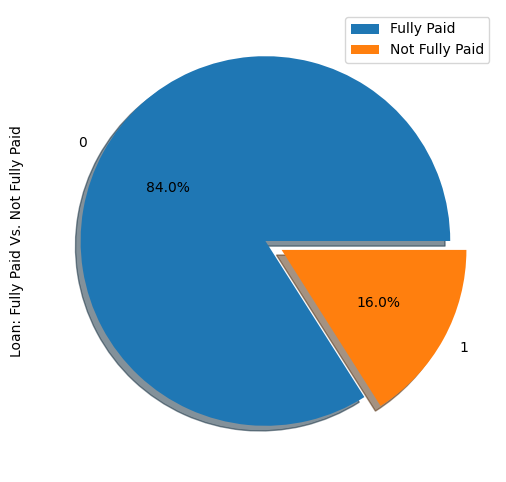

In [68]:
show_loan_distrib(loan_data)

**Observation**: A lot of loan are fully paid. About 84% of the dataset consists of loan payers. 

In [74]:
# Check for null values. 
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [75]:
# Check column types
loan_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

**Observation:** we notice that all the columns are continue variables, except the **purpose** attribute which needs to be encoded into continous variable. 

In [76]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose", drop_first=True)
encoded_loan_data.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

# Prepare for model training

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [117]:
X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify = y, random_state=2022)

# Sampling Strategies

## 1. Undersampling   
We will undersample the majority class, which corresponds to the "fully paid" (class 0)

In [99]:
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]

y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)

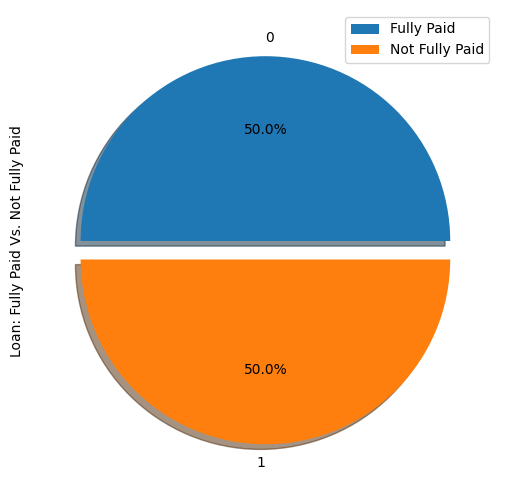

In [80]:
# Visualize the proportion of borrowers
show_loan_distrib(loan_data_undersample)

## 2. SMOTE Oversampling

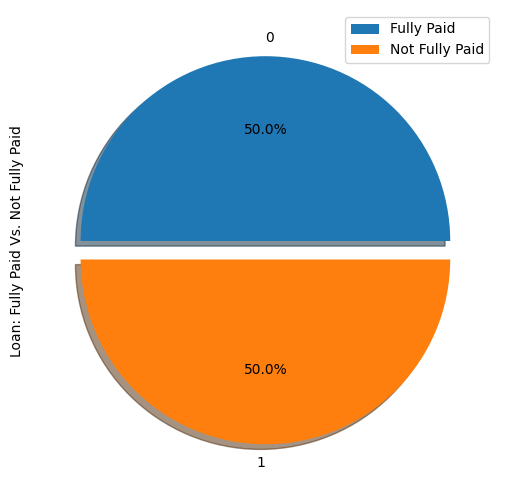

In [94]:
smote = SMOTE(sampling_strategy='minority')

X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X,y)

# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

# Classification Models

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

### 1. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [122]:
X = loan_data_undersample.drop('not.fully.paid', axis = 1)
y = loan_data_undersample['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state=2022)

logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

[[103  58]
 [ 83  78]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       161
           1       0.57      0.48      0.53       161

    accuracy                           0.56       322
   macro avg       0.56      0.56      0.56       322
weighted avg       0.56      0.56      0.56       322



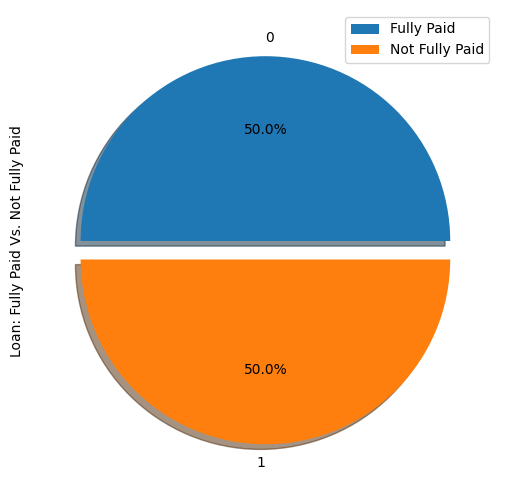

### 2. SVM

In [123]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = svc_classifier.predict(X_test)


print(classification_report(y_test,y_pred))

[[ 59 102]
 [ 41 120]]
              precision    recall  f1-score   support

           0       0.59      0.37      0.45       161
           1       0.54      0.75      0.63       161

    accuracy                           0.56       322
   macro avg       0.57      0.56      0.54       322
weighted avg       0.57      0.56      0.54       322

